# Import

In [1]:
import numpy as np 
from os import path
import pandas as pd 
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
os.environ["CUDA_VISIBLE_DEVICES"] = '0'
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib import rcParams
tickfontsize=20
labelfontsize = tickfontsize

In [3]:
import datetime

In [4]:
import math

In [5]:
import time

In [6]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

# Load data

In [7]:
ml_data = pd.read_csv('~/efrc/prep_data/no_cat_v1/data_DONOTOUCH/ml_data.csv')

/home/modules/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (14,15,16,17,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
ml_data.head()

,Unnamed: 0,filename,Metal_ID,#_of_Linkers,L0_Smiles,L1_Smiles,L2_Smiles,L3_Smiles,L4_Smiles,L5_Smiles,...,std_CH4_v/v_35_bar,norm_CH4_v/v_65_bar,mean_CH4_v/v_65_bar,std_CH4_v/v_65_bar,norm_CH4_v/v_100_bar,mean_CH4_v/v_100_bar,std_CH4_v/v_100_bar,norm_CH4_v/v_248_bar,mean_CH4_v/v_248_bar,std_CH4_v/v_248_bar
0,0,hypotheticalMOF_32526_i_2_j_11_k_9_m_3.cif,2,2,[O]C(=O)/C=C/C=C(/C(=O)[O])\Br,[O]C(=O)/C=C/C(=O)[O],NaN,NaN,NaN,NaN,...,38.761663,-0.404660,179.769656,39.064489,-0.395204,204.360203,42.586407,-0.963777,247.593271,56.068422
1,1,hypotheticalMOF_32003_i_2_j_11_k_2_m_1.cif,2,3,[O]C(=O)/C=C(/C=C(/C(=O)[O])\F)\F,[O]C(=O)/C=C(/C(=C(/C(=O)[O])\F)/F)\F,Fc1nccc(c1F)c1ccc(cc1)c1c(F)c(F)nc(c1F)F,NaN,NaN,NaN,...,38.761663,0.101287,179.769656,39.064489,0.075329,204.360203,42.586407,0.093458,247.593271,56.068422
2,2,hypotheticalMOF_1003468_i_4_j_6_k_2_m_10.cif,4,9,N#Cc1c(C#N)c(ccc1c1cc(C#N)c(c(c1)C#N)C(=O)[O])...,N#Cc1cc(cc(c1C#N)C#N)C(=O)[O],N#Cc1cc(C#N)c(c(c1C#N)C(=O)[O])C#N,N#Cc1c(c2ccc(cc2)C(=O)[O])c(C#N)c(c(c1C#N)c1cc...,N#Cc1c(C#N)cc(c(c1C#N)C(=O)[O])C#N,N#Cc1cc(ccc1C#Cc1ccc(cc1)C(=O)[O])C(=O)[O],...,38.761663,0.098730,179.769656,39.064489,0.133157,204.360203,42.586407,0.172458,247.593271,56.068422
3,3,hypotheticalMOF_3001711_i_2_j_25_k_25_m_13.cif,2,9,CCCOC(=O)[O],CCCOC(=O)[O],CCCOC(=O)[O],CCCOC(=O)[O],CCCOC(=O)[O],CCCOC(=O)[O],...,38.761663,NaN,179.769656,39.064489,0.255085,204.360203,42.586407,NaN,247.593271,56.068422
4,4,hypotheticalMOF_3498_i_0_j_7_k_3_m_0.cif,0,3,[O]C(=O)c1ccc(c2c1CC2)C(=O)[O],[O]C(=O)c1ccc(c2c1CC2)C(=O)[O],[O]C(=O)c1ccc(cc1)/N=N/c1ccc(cc1)C(=O)[O],NaN,NaN,NaN,...,38.761663,NaN,179.769656,39.064489,0.457618,204.360203,42.586407,NaN,247.593271,56.068422


In [38]:
#adjustable parameters
total_frac = 1
start_str = 'SMILES'
end_str = 'valence_pa'
training_pct = .9
patience = 10 #10 is Deepak default

In [19]:
fp_dat = ml_data.sample(frac=total_frac, random_state=0)
fp_dat

,Unnamed: 0,filename,Metal_ID,#_of_Linkers,L0_Smiles,L1_Smiles,L2_Smiles,L3_Smiles,L4_Smiles,L5_Smiles,...,std_CH4_v/v_35_bar,norm_CH4_v/v_65_bar,mean_CH4_v/v_65_bar,std_CH4_v/v_65_bar,norm_CH4_v/v_100_bar,mean_CH4_v/v_100_bar,std_CH4_v/v_100_bar,norm_CH4_v/v_248_bar,mean_CH4_v/v_248_bar,std_CH4_v/v_248_bar
69176,69223,hypotheticalMOF_3593_i_0_j_7_k_4_m_2.cif,0,3,[O]C(=O)c1ccc(cc1)/N=N/c1ccc(cc1Cl)C(=O)[O],[O]C(=O)c1ccc(cc1Cl)/N=N/c1ccc(c(c1)Cl)C(=O)[O],Clc1cc(C(=O)[O])c(cc1/N=N/c1c(Cl)cc(c(c1Cl)Cl)...,NaN,NaN,NaN,...,38.761663,NaN,179.769656,39.064489,-0.354921,204.360203,42.586407,NaN,247.593271,56.068422
21102,21110,hypotheticalMOF_5043233_i_1_j_23_k_9_m_1.cif,1,2,[O]C(=O)C#C[C@@]12CC[C@@](C([C@H]1F)(F)F)([C@H...,[O]C(=O)/C=C(/C(=O)[O])\F,NaN,NaN,NaN,NaN,...,38.761663,-0.955686,179.769656,39.064489,-0.810894,204.360203,42.586407,-1.173564,247.593271,56.068422
46293,46320,hypotheticalMOF_27246_i_1_j_18_k_18_m_2.cif,1,3,[O]C(=O)c1cc(Cl)c2c(c1)c1cc(Cl)c3c(c1cc2)cc(c(...,[O]C(=O)c1cc(Cl)c2c([c]1)c1[c]cc3c(c1cc2Cl)[c]...,Clc1cc2c(c3c1c(Cl)c(Cl)n[c]3)cc(c1c2cncc1Cl)Cl...,NaN,NaN,NaN,...,38.761663,NaN,179.769656,39.064489,-0.016301,204.360203,42.586407,NaN,247.593271,56.068422
18090,18096,hypotheticalMOF_5035712_i_1_j_20_k_0_m_5.cif,1,1,[O]C(=O)C#CC#CC#CC(=O)[O],NaN,NaN,NaN,NaN,NaN,...,38.761663,NaN,179.769656,39.064489,0.465522,204.360203,42.586407,0.270543,247.593271,56.068422
13754,13758,hypotheticalMOF_5031267_i_0_j_29_k_9_m_1.cif,0,3,[O]C(=O)/C=C/C(=O)[O],F/C(=C(\C(=O)[O])/F)/C(=O)[O],[O]C(=O)c1c(F)cc(c(c1F)F)n1c(=O)c2c(F)cc3c4c2c...,NaN,NaN,NaN,...,38.761663,1.005855,179.769656,39.064489,0.887350,204.360203,42.586407,0.592185,247.593271,56.068422
39495,39517,hypotheticalMOF_5055665_i_1_j_28_k_21_m_4.cif,1,3,C/C(=C\C#CC(=O)[O])/C#CC(=O)[O],N#C/C=C(/C#N)\C,CO[C]1N(c2[c]cc(cc2C)C(=O)[O])C(=O)c2c3c1c(C)c...,NaN,NaN,NaN,...,38.761663,NaN,179.769656,39.064489,1.090932,204.360203,42.586407,1.049613,247.593271,56.068422
20161,20167,hypotheticalMOF_35880_i_2_j_16_k_10_m_2.cif,2,4,[N]=CC(=[N])Cl.ClCl,[O]C(=O)/[C]=C/C=C/C(=O)[O].[Cl],[O]C(=O)c1ccc2c([c]1)c1[c]cc(c(c1cc2Cl)C(=O)[O...,[CH]/[C]=C(\Cl)/[CH],NaN,NaN,...,38.761663,NaN,179.769656,39.064489,-0.038009,204.360203,42.586407,NaN,247.593271,56.068422
18876,18882,hypotheticalMOF_5008993_i_0_j_21_k_21_m_2.cif,0,3,[O]C(=O)C#C/C=C/C#CC(=O)[O],Cl/C(=C(\C#CC(=O)[O])/Cl)/C#CC(=O)[O],[O]C(=O)C#C/C=C/C#CC(=O)[O],NaN,NaN,NaN,...,38.761663,-1.230404,179.769656,39.064489,-0.556891,204.360203,42.586407,0.536843,247.593271,56.068422
12776,12780,hypotheticalMOF_12646_i_0_j_16_k_1_m_1.cif,0,3,[O]C(=O)c1ccc2c(c1)c1ccc(c(c1c(c2F)F)C(=O)[O])F,Fc1cc(ccc1c1ccc(c(c1)F)C(=O)[O])C(=O)[O],FOC(=O)c1cc[c]c2c1[c]c(F)c1c2[c]c(c(c1)F)C(=O)...,NaN,NaN,NaN,...,38.761663,NaN,179.769656,39.064489,0.441928,204.360203,42.586407,NaN,247.593271,56.068422
65757,65799,hypotheticalMOF_8394_i_0_j_12_k_6_m_5.cif,0,3,CCc1cc(C#Cc2cc(CC)c(c(c2CC)CC)C(=O)[O])c(c(c1C...,[O]C(=O)C(=O)[O],CCc1cc(ccc1C#Cc1c(CC)cc(c(c1CC)CC)C(=O)[O])C(=...,NaN,NaN,NaN,...,38.761663,NaN,179.769656,39.064489,0.555553,204.360203,42.586407,NaN,247.593271,56.068422


In [20]:
def eq_space(x, y, n, force_int=False):
    step = (y - x) / (n - 1)
    if force_int:
        return [int(x + step * i) for i in range(n)]
    return [x + step * i for i in range(n)]

In [21]:
#define default params
defaults = {"patience":10, "training_pct":.8, "n_layer":2, "n_unit":10, "activation":'relu', "loss":'mse', 
            "opt":'adam', "val_pct":.2} #patience, training fraction, n hidden layers, n hidden units, activation, loss, optimizer, validation split

In [22]:
#define initial grid
init_grid = {"patience":eq_space(20, 1000, 5, True), "training_pct":eq_space(.5, .8, 5), 
             "n_layer":eq_space(3, 20, 5, True), "n_unit":eq_space(20, 1000, 5, True), "activation":['relu', 'tanh', 'sigmoid'],
             "loss":['huber_loss', 'mse', 'mean_absolute_error', 'logcosh'], 
            "opt":['sgd', 'rmsprop', 'adamax', 'adam', 'adagrad'], "val_pct":[.3, .5, 5]}
#patience, training fraction, n hidden layers, n hidden units, activation, loss, optimizer, validation split

In [23]:
property_used = 'norm_CH4_v/v_1_bar' #column name of target

In [24]:
fp_dat = ml_data.sample(frac=total_frac, random_state=0)

In [25]:
train_dataset = fp_dat.sample(frac=training_pct,random_state=2)
test_dataset = fp_dat.drop(train_dataset.index)

In [26]:
train_label = train_dataset[property_used]
test_label = test_dataset[property_used]

In [27]:
for ind, col in enumerate(ml_data.columns):
    if start_str in col:
        start_col = ind + 1
    elif end_str == col:
        end_col = ind


features = list(ml_data.columns[start_col:end_col])
other_props = ['norm_Dom._Pore_(ang.)',
 'norm_Max._Pore_(ang.)',
 'norm_Void_Fraction',
 'norm_Surf._Area_(m2/g)',
 'norm_Vol._Surf._Area',
 'norm_Density',
  'norm_valence_pa',
   'norm_atomic_rad_pa_(angstroms)',
     'norm_affinity_pa_(eV)',
       'norm_ionization_potential_pa_(eV)',
           'norm_electronegativity_pa']

features = features + other_props

In [28]:
len(features)

385

In [29]:
train_fp = train_dataset[features]
test_fp = test_dataset[features]

In [30]:
train_data = tf.data.Dataset.from_tensor_slices((train_fp.to_numpy().astype(np.float32), 
                                                     train_label.to_numpy().astype(np.float32))).batch(10000)

In [31]:
test_data = tf.data.Dataset.from_tensor_slices((test_fp.to_numpy().astype(np.float32), 
                                                    test_label.to_numpy().astype(np.float32))).batch(10000)

/home/modules/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/home/modules/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


FileNotFoundError: [Errno 2] No such file or directory: 'norm_CH4_v/v_1_bar.png'

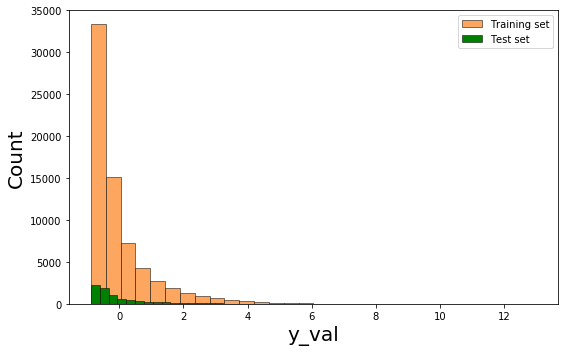

In [32]:
# plot of test and training sets
fig,ax = plt.subplots(figsize = (8,5))
n_bins=30
n, bins, patches = plt.hist(train_label, n_bins, normed=0, lw=0.5, edgecolor='k', facecolor='#FDA65F', alpha=1,label = 'Training set')
n, bins, patches = plt.hist(test_label, n_bins, normed=0, lw=0.5, edgecolor='k', facecolor='green', alpha=1, label = 'Test set')
plt.xlabel('y_val',fontsize=labelfontsize)
plt.ylabel('Count',fontsize=labelfontsize)
#ax.set_xlim(2,12)
ax.legend()
fig.tight_layout()
plt.savefig('%s.png'%property_used,dpi=200)


In [33]:
# Summary of training ( and test)
train_stats = train_fp.describe()
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Mafp_Br1_C2_C1,68744.0,6.266536e-07,0.000120,0.000000,0.000000,0.000000,0.000000,0.026917
Mafp_Br1_C2_C2,68744.0,7.168371e-06,0.000603,0.000000,0.000000,0.000000,0.000000,0.100000
Mafp_Br1_C2_C3,68744.0,1.409526e-05,0.000911,0.000000,0.000000,0.000000,0.000000,0.125000
Mafp_Br1_C3_Br1,68744.0,4.574442e-08,0.000012,0.000000,0.000000,0.000000,0.000000,0.003145
Mafp_Br1_C3_C1,68744.0,7.367559e-06,0.000676,0.000000,0.000000,0.000000,0.000000,0.142857
Mafp_Br1_C3_C2,68744.0,6.839972e-04,0.005644,0.000000,0.000000,0.000000,0.000000,0.250000
Mafp_Br1_C3_C3,68744.0,1.384394e-02,0.052858,0.000000,0.000000,0.000000,0.000000,0.500000
Mafp_Br1_C3_C4,68744.0,3.383940e-05,0.000767,0.000000,0.000000,0.000000,0.000000,0.055556
Mafp_Br1_C3_N1,68744.0,2.814522e-05,0.001393,0.000000,0.000000,0.000000,0.000000,0.125000
Mafp_Br1_C3_N2,68744.0,1.576132e-03,0.012806,0.000000,0.000000,0.000000,0.000000,0.400000


In [34]:
test_stats = test_fp.describe()
test_stats = test_stats.transpose()
test_stats

,count,mean,std,min,25%,50%,75%,max
Mafp_Br1_C2_C1,7638.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Mafp_Br1_C2_C2,7638.0,1.309243e-05,0.001144,0.000000,0.000000,0.000000,0.000000,0.100000
Mafp_Br1_C2_C3,7638.0,2.493797e-06,0.000218,0.000000,0.000000,0.000000,0.000000,0.019048
Mafp_Br1_C3_Br1,7638.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Mafp_Br1_C3_C1,7638.0,1.212262e-06,0.000106,0.000000,0.000000,0.000000,0.000000,0.009259
Mafp_Br1_C3_C2,7638.0,7.759606e-04,0.005888,0.000000,0.000000,0.000000,0.000000,0.130952
Mafp_Br1_C3_C3,7638.0,1.453487e-02,0.053843,0.000000,0.000000,0.000000,0.000000,0.466667
Mafp_Br1_C3_C4,7638.0,2.962438e-05,0.000606,0.000000,0.000000,0.000000,0.000000,0.022399
Mafp_Br1_C3_N1,7638.0,1.636554e-05,0.000826,0.000000,0.000000,0.000000,0.000000,0.041667
Mafp_Br1_C3_N2,7638.0,1.564576e-03,0.011956,0.000000,0.000000,0.000000,0.000000,0.250000


In [35]:
len(train_fp.keys())

385

In [36]:
# define the keras model
def build_model():
    model = keras.Sequential([
        layers.Dense(100, activation='relu', input_shape=[len(train_fp.keys())]),
        layers.Dense(100, activation='relu'),
        layers.Dense(100, activation='relu'),
        layers.Dense(1)
    ])

    model.compile(loss='mse',
        optimizer='adam',
        metrics=['mae', 'mse'])
    return model

In [37]:
model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               38600     
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
Total params: 58,901
Trainable params: 58,901
Non-trainable params: 0
_________________________________________________________________


In [39]:
# NN model training
EPOCHS = 1000

model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=patience)
checkpoint_callbacks = keras.callbacks.ModelCheckpoint(filepath='model_checkpoint.h5', monitor='val_loss',\
                                                      verbose=1, save_best_only=True, mode='min')
# early_history = model.fit(normed_train_data, train_label.to_numpy(), 
#                     epochs=EPOCHS, validation_split = 0.2, verbose=1, callbacks=[early_stop,checkpoint_callbacks])
log_dir="logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
early_history = model.fit(train_fp.to_numpy(), train_label.to_numpy(), 
                    epochs=EPOCHS, validation_split = 0.2, verbose=1,\
                          callbacks=[early_stop,checkpoint_callbacks,tfdocs.modeling.EpochDots(),tensorboard_callback])
                        


Train on 54995 samples, validate on 13749 samples
Epoch 1/1000
54560/54995 [============================>.] - ETA: 0s - loss: 0.1942 - mae: 0.2131 - mse: 0.1942
Epoch 00001: val_loss improved from inf to 0.14005, saving model to model_checkpoint.h5

Epoch: 0, loss:0.1935,  mae:0.2128,  mse:0.1935,  val_loss:0.1400,  val_mae:0.1733,  val_mse:0.1400,  
54995/54995 [==============================] - 7s 133us/sample - loss: 0.1935 - mae: 0.2128 - mse: 0.1935 - val_loss: 0.1400 - val_mae: 0.1733 - val_mse: 0.1400
Epoch 2/1000
54528/54995 [============================>.] - ETA: 0s - loss: 0.1471 - mae: 0.1769 - mse: 0.1471
Epoch 00002: val_loss improved from 0.14005 to 0.12258, saving model to model_checkpoint.h5
54995/54995 [==============================] - 7s 122us/sample - loss: 0.1465 - mae: 0.1767 - mse: 0.1465 - val_loss: 0.1226 - val_mae: 0.1541 - val_mse: 0.1226
Epoch 3/1000
54912/54995 [============================>.] - ETA: 0s - loss: 0.1316 - mae: 0.1647 - mse: 0.1316
Epoch 00003

54848/54995 [============================>.] - ETA: 0s - loss: 0.0945 - mae: 0.1275 - mse: 0.0945
Epoch 00024: val_loss improved from 0.10271 to 0.10115, saving model to model_checkpoint.h5
54995/54995 [==============================] - 7s 118us/sample - loss: 0.0944 - mae: 0.1275 - mse: 0.0944 - val_loss: 0.1011 - val_mae: 0.1307 - val_mse: 0.1011
Epoch 25/1000
54592/54995 [============================>.] - ETA: 0s - loss: 0.0938 - mae: 0.1268 - mse: 0.0938
Epoch 00025: val_loss did not improve from 0.10115
54995/54995 [==============================] - 7s 120us/sample - loss: 0.0935 - mae: 0.1269 - mse: 0.0935 - val_loss: 0.1012 - val_mae: 0.1335 - val_mse: 0.1012
Epoch 26/1000
54944/54995 [============================>.] - ETA: 0s - loss: 0.0935 - mae: 0.1266 - mse: 0.0935
Epoch 00026: val_loss did not improve from 0.10115
54995/54995 [==============================] - 7s 120us/sample - loss: 0.0935 - mae: 0.1266 - mse: 0.0935 - val_loss: 0.1025 - val_mae: 0.1346 - val_mse: 0.1025
E

Text(0, 0.5, 'MAE')

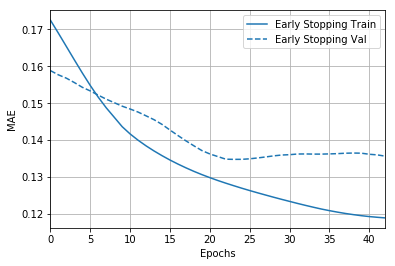

In [40]:
# Check if run converged
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)
plotter.plot({'Early Stopping': early_history}, metric = "mae")
#plt.ylim([0, 0.15])
plt.ylabel('MAE')

7638/7638 - 0s - loss: 0.0628 - mae: 0.1275 - mse: 0.0628
Testing set Mean Abs Error:  0.13 bg
68744/68744 - 3s - loss: 0.0856 - mae: 0.1190 - mse: 0.0856


W0309 20:41:31.257315 140043953170176 legend.py:1289] No handles with labels found to put in legend.


FileNotFoundError: [Errno 2] No such file or directory: './norm_CH4_v/v_1_bar_test_parity_1.png'

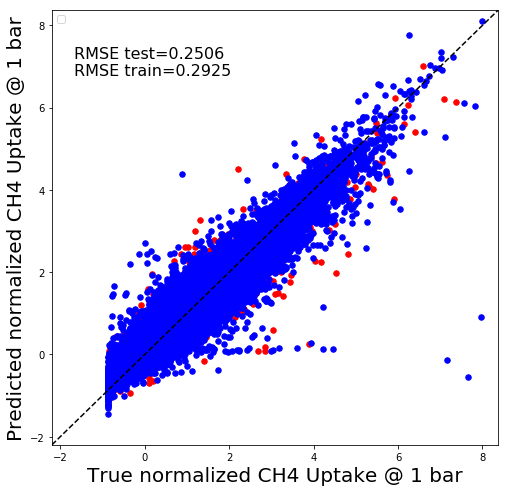

In [41]:
# Evaluation of test error and plotting parity

#model = tf.keras.models.load_model('model_checkpoint_bandgap.h5')
loss, mae, mse = model.evaluate(test_fp.to_numpy(), test_label.to_numpy(), verbose=2)
print("Testing set Mean Abs Error: {:5.2f} bg".format(mae))

tr_loss, tr_mae, tr_mse = model.evaluate(train_fp.to_numpy(), train_label.to_numpy(), verbose=2)

tr_rmse = math.sqrt(tr_mse)
rmse = math.sqrt(mse)

test_predictions = model.predict(test_fp.to_numpy()).flatten()


train_predictions = model.predict(train_fp.to_numpy()).flatten()

fig1,ax1 = plt.subplots(figsize = (8,8))
ax1.scatter(test_label, test_predictions, c='r',s=30)

ax1.scatter(train_label, train_predictions, c='b',s=30)

ax1.set_xlabel('True normalized CH4 Uptake @ 1 bar',fontsize=labelfontsize)
ax1.set_ylabel('Predicted normalized CH4 Uptake @ 1 bar',fontsize=labelfontsize)
ax1.set_xlim(min([min(test_label),min(test_predictions)])-1,max([max(test_label),max(test_predictions)])+1)
ax1.set_ylim(min([min(test_label),min(test_predictions)])-1,max([max(test_label),max(test_predictions)])+1)
ax1.legend()
plot_x_min, plot_x_max = plt.xlim()
plot_y_min, plot_y_max = plt.ylim()

ax1.plot(np.linspace(plot_x_min,plot_x_max,100),np.linspace(plot_y_min,plot_y_max,100),c='k',ls='--')
text_position_x = plot_x_min + (plot_x_max - plot_x_min) * 0.05
text_position_y = plot_y_max - (plot_y_max - plot_y_min) * 0.15

ax1.text(text_position_x, text_position_y, "RMSE test=" + str("%.4f" % rmse) + '\n' + 
         "RMSE train=" + str("%.4f" % tr_rmse), ha='left', fontsize=16)

# ax1.text(text_position_x, text_position_y, "MAE=" + str("%.4f" % mae) + ' \n' + 
#          "MSE=" + str("%.4f" % mse), ha='left', fontsize=16)
fig.tight_layout()
plt.savefig('./%s_test_parity_%s.png'%(property_used, total_frac),dpi=200)



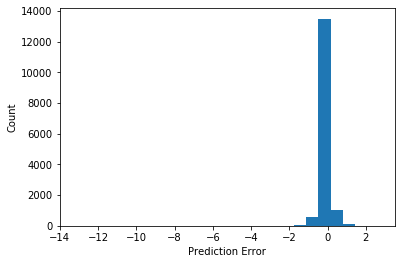

In [123]:
error = test_predictions - test_label
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error")
_ = plt.ylabel("Count")

# Test functions

In [36]:
eq_space(4,9, 5, True)

[4, 5, 6, 7, 9]

In [81]:
total_frac = 1
defaults = [10, .8, 3, 100, 'relu', 'mse', 'adam', .2]
patience = defaults[0]
training_pct = defaults[1]
n_layer = defaults[2]
n_unit = defaults[3]
activation = defaults[4]
loss = defaults[5]
opt = defaults[6]
val_pct = defaults[7]

In [82]:
mse = evaluate_model(ml_data, total_frac, start_str, end_str, patience, training_pct, n_layer, n_unit, activation, 
                   loss, opt, val_pct)

385
Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_56 (Dense)             (None, 100)               38600     
_________________________________________________________________
dense_57 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_58 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_59 (Dense)             (None, 1)                 101       
Total params: 58,901
Trainable params: 58,901
Non-trainable params: 0
_________________________________________________________________
Train on 48884 samples, validate on 12222 samples
Epoch 1/5000
47616/48884 [============================>.] - ETA: 0s - loss: 0.1944 - mae: 0.2153 - mse: 0.1944
Epoch 00001: val_loss improved from inf to 0.14806, saving model to model_checkpoi

48224/48884 [============================>.] - ETA: 0s - loss: 0.1001 - mae: 0.1318 - mse: 0.1001
Epoch 00022: val_loss improved from 0.10549 to 0.10472, saving model to model_checkpoint.h5
48884/48884 [==============================] - 2s 37us/sample - loss: 0.0995 - mae: 0.1317 - mse: 0.0995 - val_loss: 0.1047 - val_mae: 0.1333 - val_mse: 0.1047
Epoch 23/5000
48416/48884 [============================>.] - ETA: 0s - loss: 0.0996 - mae: 0.1306 - mse: 0.0996
Epoch 00023: val_loss did not improve from 0.10472
48884/48884 [==============================] - 2s 37us/sample - loss: 0.0994 - mae: 0.1308 - mse: 0.0994 - val_loss: 0.1103 - val_mae: 0.1474 - val_mse: 0.1103
Epoch 24/5000
48480/48884 [============================>.] - ETA: 0s - loss: 0.0959 - mae: 0.1292 - mse: 0.0959
Epoch 00024: val_loss did not improve from 0.10472
48884/48884 [==============================] - 2s 37us/sample - loss: 0.0972 - mae: 0.1291 - mse: 0.0972 - val_loss: 0.1101 - val_mae: 0.1421 - val_mse: 0.1101
Epoc

In [84]:
mse

0.09473248

In [65]:
total_frac = .1
defaults = {"patience":10, "training_pct":.8, "n_layer":7, "n_unit":20, "activation":'relu', "loss":'mean_absolute_error', 
            "opt":'rmsprop', "val_pct":.2}
all_grid = {"patience":[10], "training_pct":eq_space(.5, .8, 5), 
             "n_layer":eq_space(3, 20, 5, True), "n_unit":eq_space(20, 1000, 5, True), "activation":['relu', 'tanh', 'sigmoid'],
             "loss":['huber_loss', 'mse', 'mean_absolute_error', 'logcosh'], 
            "opt":['sgd', 'rmsprop', 'adamax', 'adam', 'adagrad'], "val_pct":eq_space(.2, .5, 5)}


init_grid = {"val_pct":eq_space(.2, .5, 5)}

In [66]:
#patience_d, training_pct_d, n_layer_d, n_unit_d, activation_d, loss_d, opt_d, val_pct_d 
r = varyParams(ml_data, defaults, init_grid, total_frac, start_str, end_str)

Patience:  10
training_pct:  0.8
n_layer:  7
n_unit:  20
activation:  relu
loss:  mean_absolute_error
opt:  rmsprop
val_pct:  0.2
385
Model: "sequential_47"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_318 (Dense)            (None, 20)                7720      
_________________________________________________________________
dense_319 (Dense)            (None, 20)                420       
_________________________________________________________________
dense_320 (Dense)            (None, 20)                420       
_________________________________________________________________
dense_321 (Dense)            (None, 20)                420       
_________________________________________________________________
dense_322 (Dense)            (None, 20)                420       
_________________________________________________________________
dense_323 (Dense)            (None, 20)            

Epoch 21/2000
4416/4888 [==========================>...] - ETA: 0s - loss: 0.1564 - mae: 0.1564 - mse: 0.1463
Epoch 00021: val_loss improved from 0.18904 to 0.18687, saving model to model_checkpoint.h5
4888/4888 [==============================] - 0s 45us/sample - loss: 0.1582 - mae: 0.1582 - mse: 0.1666 - val_loss: 0.1869 - val_mae: 0.1869 - val_mse: 0.2211
Epoch 22/2000
3872/4888 [======================>.......] - ETA: 0s - loss: 0.1544 - mae: 0.1544 - mse: 0.1489
Epoch 00022: val_loss did not improve from 0.18687
4888/4888 [==============================] - 0s 44us/sample - loss: 0.1562 - mae: 0.1562 - mse: 0.1604 - val_loss: 0.1928 - val_mae: 0.1928 - val_mse: 0.2369
Epoch 23/2000
4224/4888 [========================>.....] - ETA: 0s - loss: 0.1560 - mae: 0.1560 - mse: 0.1701
Epoch 00023: val_loss did not improve from 0.18687
4888/4888 [==============================] - 0s 43us/sample - loss: 0.1541 - mae: 0.1541 - mse: 0.1568 - val_loss: 0.1910 - val_mae: 0.1910 - val_mse: 0.2350
Ep

4416/4888 [==========================>...] - ETA: 0s - loss: 0.1374 - mae: 0.1374 - mse: 0.1448
Epoch 00046: val_loss did not improve from 0.16954
4888/4888 [==============================] - 0s 41us/sample - loss: 0.1364 - mae: 0.1364 - mse: 0.1380 - val_loss: 0.1732 - val_mae: 0.1732 - val_mse: 0.2062
Epoch 47/2000
4544/4888 [==========================>...] - ETA: 0s - loss: 0.1384 - mae: 0.1384 - mse: 0.1468
Epoch 00047: val_loss did not improve from 0.16954
4888/4888 [==============================] - 0s 41us/sample - loss: 0.1360 - mae: 0.1360 - mse: 0.1394 - val_loss: 0.1772 - val_mae: 0.1772 - val_mse: 0.2112
1528/1528 - 0s - loss: 0.1615 - mae: 0.1615 - mse: 0.1068
Patience:  10
training_pct:  0.8
n_layer:  7
n_unit:  20
activation:  relu
loss:  mean_absolute_error
opt:  rmsprop
val_pct:  0.275
385
Model: "sequential_48"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_326 (Dense)          

4429/4429 [==============================] - 0s 46us/sample - loss: 0.1665 - mae: 0.1665 - mse: 0.1767 - val_loss: 0.1888 - val_mae: 0.1888 - val_mse: 0.2113
Epoch 19/2000
3392/4429 [=====================>........] - ETA: 0s - loss: 0.1657 - mae: 0.1657 - mse: 0.1410
Epoch 00019: val_loss did not improve from 0.17982
4429/4429 [==============================] - 0s 55us/sample - loss: 0.1681 - mae: 0.1681 - mse: 0.1812 - val_loss: 0.1996 - val_mae: 0.1996 - val_mse: 0.2086
Epoch 20/2000
4064/4429 [==========================>...] - ETA: 0s - loss: 0.1652 - mae: 0.1652 - mse: 0.1792
Epoch 00020: val_loss did not improve from 0.17982
4429/4429 [==============================] - 0s 59us/sample - loss: 0.1655 - mae: 0.1655 - mse: 0.1724 - val_loss: 0.2297 - val_mae: 0.2297 - val_mse: 0.2568
Epoch 21/2000
4320/4429 [============================>.] - ETA: 0s - loss: 0.1631 - mae: 0.1631 - mse: 0.1775
Epoch 00021: val_loss did not improve from 0.17982
4429/4429 [==============================] 

Epoch 16/2000
2624/3971 [==================>...........] - ETA: 0s - loss: 0.1592 - mae: 0.1592 - mse: 0.1330
Epoch 00016: val_loss did not improve from 0.19382
3971/3971 [==============================] - 0s 50us/sample - loss: 0.1630 - mae: 0.1630 - mse: 0.1786 - val_loss: 0.2224 - val_mae: 0.2224 - val_mse: 0.2115
Epoch 17/2000
2336/3971 [================>.............] - ETA: 0s - loss: 0.1524 - mae: 0.1524 - mse: 0.2161
Epoch 00017: val_loss did not improve from 0.19382
3971/3971 [==============================] - 0s 52us/sample - loss: 0.1586 - mae: 0.1586 - mse: 0.1732 - val_loss: 0.2274 - val_mae: 0.2274 - val_mse: 0.2038
Epoch 18/2000
3840/3971 [============================>.] - ETA: 0s - loss: 0.1576 - mae: 0.1576 - mse: 0.1752
Epoch 00018: val_loss did not improve from 0.19382
3971/3971 [==============================] - 0s 54us/sample - loss: 0.1582 - mae: 0.1582 - mse: 0.1739 - val_loss: 0.3448 - val_mae: 0.3448 - val_mse: 0.3433
Epoch 19/2000
2784/3971 [==================

Epoch 4/2000
2432/3513 [===================>..........] - ETA: 0s - loss: 0.2120 - mae: 0.2120 - mse: 0.2422
Epoch 00004: val_loss improved from 0.22949 to 0.21983, saving model to model_checkpoint.h5
3513/3513 [==============================] - 0s 64us/sample - loss: 0.2162 - mae: 0.2162 - mse: 0.2532 - val_loss: 0.2198 - val_mae: 0.2198 - val_mse: 0.2476
Epoch 5/2000
2336/3513 [==================>...........] - ETA: 0s - loss: 0.2069 - mae: 0.2069 - mse: 0.2829
Epoch 00005: val_loss improved from 0.21983 to 0.20917, saving model to model_checkpoint.h5
3513/3513 [==============================] - 0s 64us/sample - loss: 0.2053 - mae: 0.2053 - mse: 0.2406 - val_loss: 0.2092 - val_mae: 0.2092 - val_mse: 0.2179
Epoch 6/2000
2304/3513 [==================>...........] - ETA: 0s - loss: 0.2048 - mae: 0.2048 - mse: 0.2467
Epoch 00006: val_loss did not improve from 0.20917
3513/3513 [==============================] - 0s 59us/sample - loss: 0.1999 - mae: 0.1999 - mse: 0.2336 - val_loss: 0.2130 

2272/3055 [=====================>........] - ETA: 0s - loss: 0.1640 - mae: 0.1640 - mse: 0.1863
Epoch 00018: val_loss did not improve from 0.18515
3055/3055 [==============================] - 0s 66us/sample - loss: 0.1639 - mae: 0.1639 - mse: 0.1671 - val_loss: 0.2228 - val_mae: 0.2228 - val_mse: 0.2724
Epoch 19/2000
2720/3055 [=========================>....] - ETA: 0s - loss: 0.1656 - mae: 0.1656 - mse: 0.1758
Epoch 00019: val_loss did not improve from 0.18515
3055/3055 [==============================] - 0s 61us/sample - loss: 0.1650 - mae: 0.1650 - mse: 0.1660 - val_loss: 0.2010 - val_mae: 0.2010 - val_mse: 0.2104
Epoch 20/2000
2656/3055 [=========================>....] - ETA: 0s - loss: 0.1590 - mae: 0.1590 - mse: 0.1334
Epoch 00020: val_loss did not improve from 0.18515
3055/3055 [==============================] - 0s 63us/sample - loss: 0.1632 - mae: 0.1632 - mse: 0.1652 - val_loss: 0.2712 - val_mae: 0.2712 - val_mse: 0.3200
Epoch 21/2000
2720/3055 [=========================>....] 

In [67]:
r

{0.2: 0.106797,
 0.275: 0.14296195,
 0.35: 0.13522059,
 0.425: 0.1300026,
 0.5: 0.13410667}

In [123]:
start = time.time()

training_pct = .9
total_frac = 1
mse, model = evaluate_model(ml_data, total_frac, start_str, end_str, 10, training_pct, 3, 200, 'relu', 
                   'mse', 'adam', .2, batch_size=5000, norm=False)

end = time.time()

print("Time elapsed: ", end - start)

Patience:  10
training_pct:  0.9
n_layer:  3
n_unit:  200
activation:  relu
loss:  mse
opt:  adam
val_pct:  0.2
385
Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_35 (Dense)             (None, 200)               77200     
_________________________________________________________________
dense_36 (Dense)             (None, 200)               40200     
_________________________________________________________________
dense_37 (Dense)             (None, 200)               40200     
_________________________________________________________________
dense_38 (Dense)             (None, 1)                 201       
Total params: 157,801
Trainable params: 157,801
Non-trainable params: 0
_________________________________________________________________
Train for 14 steps, validate for 14 steps
Epoch 1/2000
 9/14 [==================>...........] - ETA: 0s - loss: 0.6858 - mae: 0.50

Epoch 46/2000
 9/14 [==================>...........] - ETA: 0s - loss: 0.0923 - mae: 0.1230 - mse: 0.0923
Epoch 00046: val_loss did not improve from 0.09059
14/14 [==============================] - 1s 43ms/step - loss: 0.0906 - mae: 0.1227 - mse: 0.0914 - val_loss: 0.0923 - val_mae: 0.1301 - val_mse: 0.0932
Epoch 47/2000
12/14 [========================>.....] - ETA: 0s - loss: 0.0941 - mae: 0.1231 - mse: 0.0941
Epoch 00047: val_loss improved from 0.09059 to 0.09047, saving model to model_checkpoint.h5
14/14 [==============================] - 1s 49ms/step - loss: 0.0906 - mae: 0.1229 - mse: 0.0915 - val_loss: 0.0905 - val_mae: 0.1258 - val_mse: 0.0914
Epoch 48/2000
 9/14 [==================>...........] - ETA: 0s - loss: 0.0929 - mae: 0.1246 - mse: 0.0929
Epoch 00048: val_loss improved from 0.09047 to 0.08873, saving model to model_checkpoint.h5
14/14 [==============================] - 1s 44ms/step - loss: 0.0907 - mae: 0.1236 - mse: 0.0916 - val_loss: 0.0887 - val_mae: 0.1201 - val_mse

Epoch 71/2000
 9/14 [==================>...........] - ETA: 0s - loss: 0.0851 - mae: 0.1179 - mse: 0.0851
Epoch 00071: val_loss improved from 0.08229 to 0.08199, saving model to model_checkpoint.h5
14/14 [==============================] - 1s 43ms/step - loss: 0.0836 - mae: 0.1177 - mse: 0.0844 - val_loss: 0.0820 - val_mae: 0.1156 - val_mse: 0.0829
Epoch 72/2000
13/14 [==========================>...] - ETA: 0s - loss: 0.0869 - mae: 0.1181 - mse: 0.0869
Epoch 00072: val_loss improved from 0.08199 to 0.08171, saving model to model_checkpoint.h5
14/14 [==============================] - 1s 44ms/step - loss: 0.0832 - mae: 0.1173 - mse: 0.0840 - val_loss: 0.0817 - val_mae: 0.1156 - val_mse: 0.0826
Epoch 73/2000
10/14 [====================>.........] - ETA: 0s - loss: 0.0869 - mae: 0.1179 - mse: 0.0869
Epoch 00073: val_loss improved from 0.08171 to 0.08130, saving model to model_checkpoint.h5
14/14 [==============================] - 1s 43ms/step - loss: 0.0830 - mae: 0.1171 - mse: 0.0839 - val

Epoch 95/2000
13/14 [==========================>...] - ETA: 0s - loss: 0.0803 - mae: 0.1122 - mse: 0.0803
Epoch 00095: val_loss improved from 0.07713 to 0.07664, saving model to model_checkpoint.h5
14/14 [==============================] - 1s 50ms/step - loss: 0.0768 - mae: 0.1115 - mse: 0.0776 - val_loss: 0.0766 - val_mae: 0.1150 - val_mse: 0.0775
Epoch 96/2000
 9/14 [==================>...........] - ETA: 0s - loss: 0.0793 - mae: 0.1147 - mse: 0.0793
Epoch 00096: val_loss did not improve from 0.07664
14/14 [==============================] - 1s 45ms/step - loss: 0.0789 - mae: 0.1151 - mse: 0.0795 - val_loss: 0.0888 - val_mae: 0.1374 - val_mse: 0.0897
Epoch 97/2000
13/14 [==========================>...] - ETA: 0s - loss: 0.0836 - mae: 0.1183 - mse: 0.0836
Epoch 00097: val_loss did not improve from 0.07664
14/14 [==============================] - 1s 45ms/step - loss: 0.0799 - mae: 0.1173 - mse: 0.0807 - val_loss: 0.0779 - val_mae: 0.1123 - val_mse: 0.0788
Epoch 98/2000
10/14 [===========

In [124]:
mse

0.060335603

In [127]:
tr_loss, tr_mae, tr_mse = model.evaluate(train_data, verbose=2)

7/7 - 0s - loss: 0.0791 - mae: 0.1170 - mse: 0.0795


In [128]:
tr_mse

0.079521105

In [129]:
math.sqrt(mse)

0.24563306497966297

In [112]:
preds = model.predict(test_data)

In [113]:
len(preds)

7638

In [114]:
preds.size

7638

In [115]:
len(test_label.values)

7638

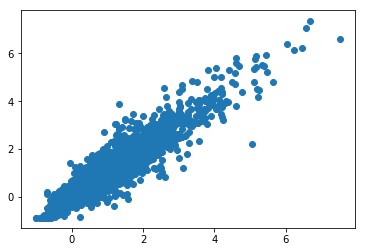

In [116]:
plt.scatter(preds, test_label)